# Tensors and example

In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from PIL import Image

sns.set()
%matplotlib inline

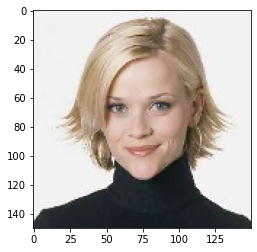

In [3]:
# load and show the image
FILE = './images/reese_witherspoon.jpg'
img = mpimg.imread(FILE)
imgplot = plt.imshow(img)

In [4]:
# Tensor dimensions
img.shape

(150, 150, 3)

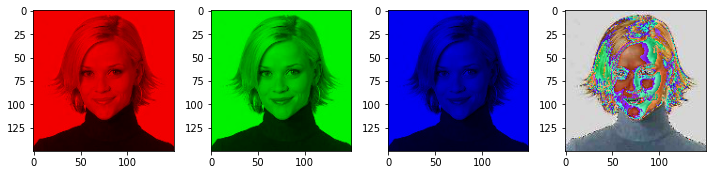

In [5]:
plt.figure(figsize = (10,5))
for i in range(3):
    plt.subplot(1,4,i+1)
    temp = np.zeros(img.shape, dtype='uint8')
    temp[:,:,i] = img[:,:,i]
    plt.imshow(temp)

temp = img
plt.subplot(1,4,4)
# multiply image values with scalar
plt.imshow(temp*3)

plt.tight_layout()
    

## Fashion MNIST

### 1. Load Data

In [7]:
# get the data from keras
fashion_mnist = tf.keras.datasets.fashion_mnist

# load the data splitted in train and test! how nice!
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()


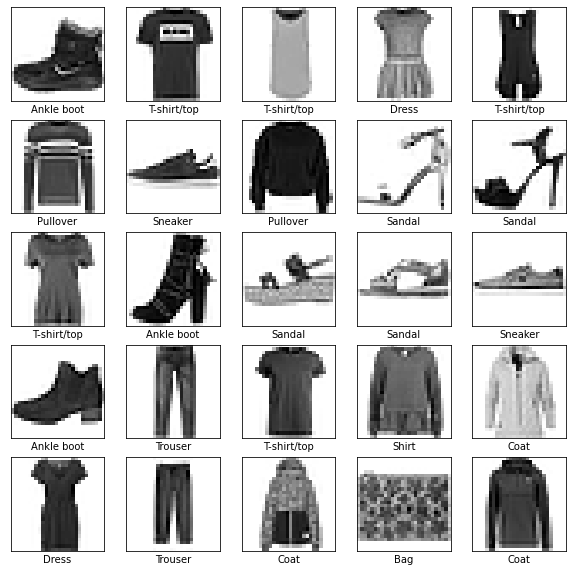

In [8]:
# pixel values range (0,255) ... normalize pixel based on max intensity 
x_train, x_test = x_train/255.0, x_test/255.0

# classes are named 0-9 so define names for plotting clarity
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot a few of the images
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])  # class based on y_train value

plt.show()


In [153]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### 2. Model Layers

In [164]:
# The FCNN has 5 layers, each with 100 nodes
model = models.Sequential(name = 'Fashion_MNIST')

# input layer --- this converts 28x28 into 1D array
model.add(layers.Flatten(input_shape=(28, 28)))

# Add 2 hidden layers 
model.add(layers.Dense(154,  activation='relu'))
model.add(layers.Dense(64,  activation='relu'))
#model.add(layers.Dropout(0.2))

# Add the output layer with ten neurons since 10 classes to predict
model.add(layers.Dense(10,  activation='softmax'))

# View the model summary
model.summary()

Model: "Fashion_MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 154)               120890    
_________________________________________________________________
dense_25 (Dense)             (None, 64)                9920      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 131,460
Trainable params: 131,460
Non-trainable params: 0
_________________________________________________________________


### 3. Compile model

In [165]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [156]:
tf.keras.utils.plot_model(
    model,
    #to_file='model.png', # if you want to save the image
    show_shapes=True, # True for more details than you need
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### 4. Fit model

In [177]:
history = model.fit(x_train, y_train, epochs = 50, validation_split = 0.33, verbose = 2)

Epoch 1/50
1257/1257 - 2s - loss: 0.0992 - accuracy: 0.9687 - val_loss: 0.8805 - val_accuracy: 0.8894
Epoch 2/50
1257/1257 - 2s - loss: 0.0515 - accuracy: 0.9809 - val_loss: 0.9383 - val_accuracy: 0.8881
Epoch 3/50
1257/1257 - 2s - loss: 0.0555 - accuracy: 0.9812 - val_loss: 0.8334 - val_accuracy: 0.8925
Epoch 4/50
1257/1257 - 2s - loss: 0.0553 - accuracy: 0.9808 - val_loss: 0.8390 - val_accuracy: 0.8938
Epoch 5/50
1257/1257 - 2s - loss: 0.0540 - accuracy: 0.9812 - val_loss: 0.8668 - val_accuracy: 0.8902
Epoch 6/50
1257/1257 - 2s - loss: 0.0439 - accuracy: 0.9844 - val_loss: 0.8989 - val_accuracy: 0.8897
Epoch 7/50
1257/1257 - 2s - loss: 0.0575 - accuracy: 0.9801 - val_loss: 0.8620 - val_accuracy: 0.8920
Epoch 8/50
1257/1257 - 2s - loss: 0.0494 - accuracy: 0.9827 - val_loss: 0.8015 - val_accuracy: 0.8925
Epoch 9/50
1257/1257 - 2s - loss: 0.0498 - accuracy: 0.9818 - val_loss: 0.8331 - val_accuracy: 0.8881
Epoch 10/50
1257/1257 - 2s - loss: 0.0457 - accuracy: 0.9840 - val_loss: 0.8684 - 

In [179]:
# save the model so you do not have to run the code everytime
model.save('fashion_model.h5')

In [11]:
# Recreate the exact same model purely from the file
model = tf.keras.models.load_model('fashion_model.h5')

### 5. Evaluate model on test set

In [180]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy={test_accuracy}')

Test accuracy=0.8806999921798706


### 6. Plot and analyze

In [169]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


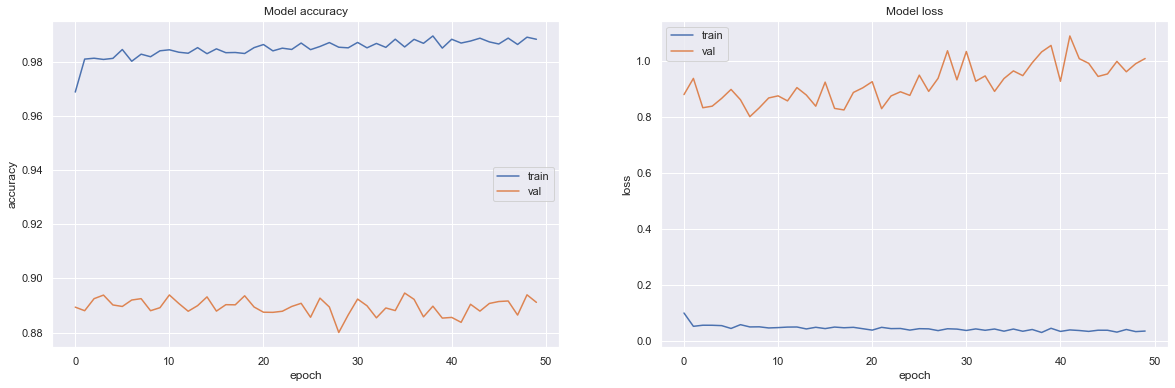

In [208]:
# plot accuracy and loss for the test set
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

### 7. Predict and check

In [12]:
predictions = model.predict(x_test)

In [17]:
predictions[0] # gives the proabilities for each class

array([3.1575424e-18, 5.7318281e-19, 3.2911588e-20, 3.0168844e-16,
       1.8641350e-26, 3.1891604e-11, 1.0447586e-21, 3.5944105e-09,
       5.2121674e-14, 1.0000000e+00], dtype=float32)

In [23]:
# See what gets predicted
(np.argmax(predictions[0]), class_names[np.argmax(predictions[0])])

(9, 'Ankle boot')

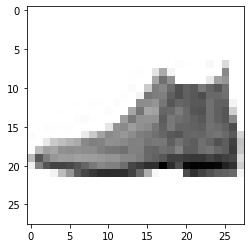

In [24]:
# Check if this is right!
plt.imshow(x_test[0], cmap=plt.cm.binary)

In [55]:
predictions[4]

array([2.59350121e-01, 3.56992627e-31, 1.85469190e-07, 2.49881813e-15,
       1.25366336e-17, 1.89341637e-22, 7.40649700e-01, 3.58496873e-29,
       9.97770084e-15, 8.28263330e-34], dtype=float32)

<BarContainer object of 10 artists>

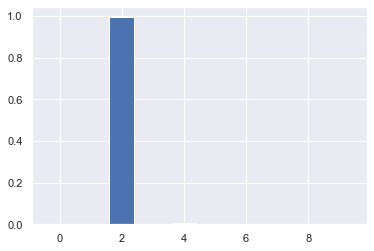

In [50]:
plt.bar(range(10), predictions[406])


In [57]:
x_test[0].shape

(28, 28)